In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('../../data/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['SibSp','Parch'], axis=1, inplace=True)

In [4]:
minor = df[df['Age'] <= 18]


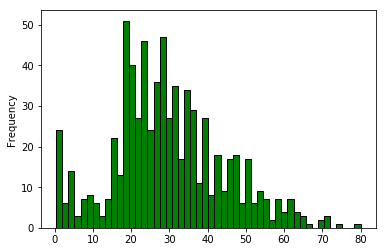

In [14]:
df['Age'].plot.hist(bins=50, color='green',edgecolor='black')

In [65]:
minor = df['Age'] <= 18
survived = df['Survived'] == 1
age_missing = [x == None for x in df['Age'] ]
missing = df[age_missing]
missing.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


79.58


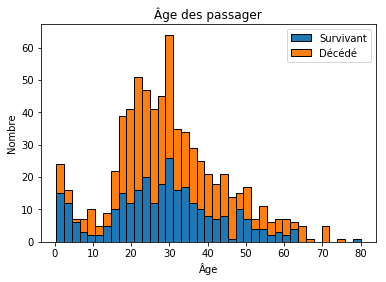

In [45]:
x = df['Age'].max() - df['Age'].min()
plt.hist([df.loc[survived,'Age'],df.loc[~survived,'Age']],stacked=True, edgecolor='black', bins=int(x/2))
plt.legend(['Survivant','Décédé'], loc='upper right')
plt.xlabel('Âge')
plt.ylabel('Nombre')
plt.title('Âge des passager')
plt.show()

Text(0, 0.5, 'Age')

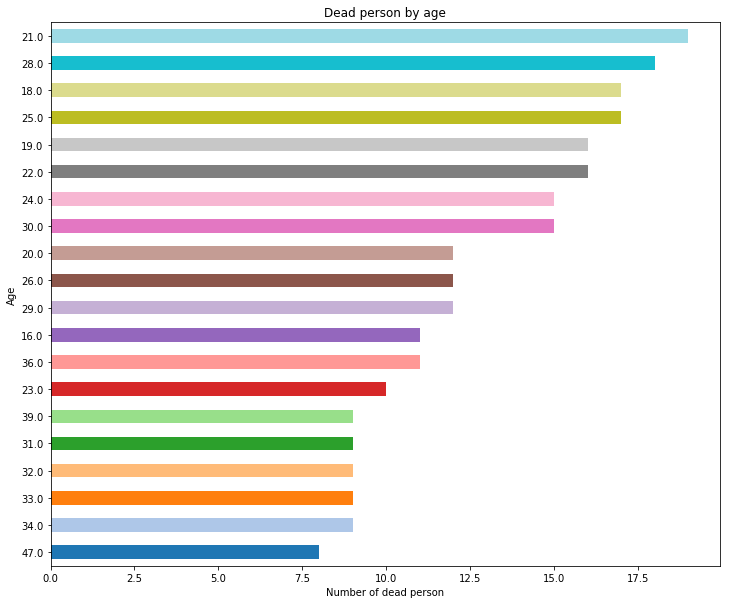

In [120]:
dead = [ x == 0 for x in df['Survived'] ]

count = df[dead].groupby('Age').size()
count = count.nlargest(20)
count = count.sort_values(ascending = True)
# count = df[decede].groupby('Range').size()
#count = count.sort_values()
plt.figure(figsize=(12,10))
colormap = plt.cm.tab20(range(0, len(count)))
plot = count.plot.barh(title='Dead person by age', color=colormap)
plot.set_xlabel('Number of dead person')
plot.set_ylabel('Age')

